In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# Generate a synthetic dataset
torch.manual_seed(42)
num_samples = 1000
input_size = 20
num_classes = 2

# Input data and labels
X = torch.randn(num_samples, input_size)
y = torch.randint(0, num_classes, (num_samples,))

In [4]:
X.shape

torch.Size([1000, 20])

In [5]:
y.shape

torch.Size([1000])

In [6]:
batch_size = 64
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [7]:
# Define a simple neural network WITHOUT Batch Normalization
class SimpleNNWithoutBN(nn.Module):
    def __init__(self):
        super(SimpleNNWithoutBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
# Define a simple neural network WITH Batch Normalization
class SimpleNNWithBN(nn.Module):
    def __init__(self):
        super(SimpleNNWithBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))  # Batch Normalization after fc1
        x = torch.relu(self.bn2(self.fc2(x)))  # Batch Normalization after fc2
        x = self.fc3(x)
        return x

In [9]:
# Function to train the model
def train_model(model, dataloader, epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses

In [10]:

# Instantiate both models
model_without_bn = SimpleNNWithoutBN()
model_with_bn = SimpleNNWithBN()

In [11]:
# Train both models
epochs = 20
losses_without_bn = train_model(model_without_bn, dataloader, epochs=epochs)
losses_with_bn = train_model(model_with_bn, dataloader, epochs=epochs)

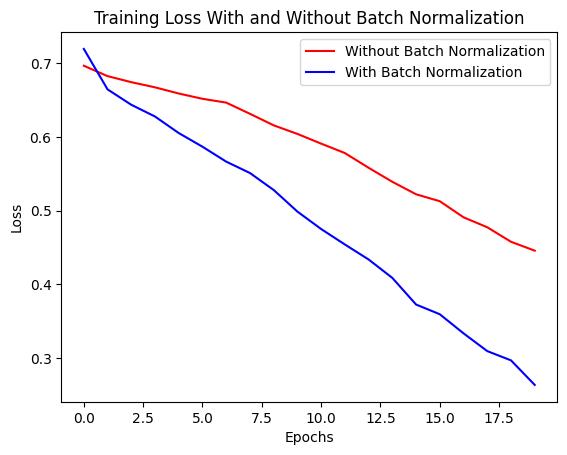

In [12]:
# Plot the training loss curves for both models
plt.plot(range(epochs), losses_without_bn, label='Without Batch Normalization', color='red')
plt.plot(range(epochs), losses_with_bn, label='With Batch Normalization', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss With and Without Batch Normalization')
plt.legend()
plt.show()

- The blue curve (with Batch Normalization) converges faster and achieves a lower training loss compared to the red curve (without Batch Normalization).
- The red curve takes longer to reduce the loss, and its progress is slightly more gradual.